In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [123]:
df=pd.read_csv(r"C:\Users\dell\Documents\PDFs\Staragile\pandas databasse\insurance.csv")

In [124]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [126]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [127]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [128]:
df1=df.drop_duplicates()

In [129]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [130]:
df1['sex'].unique()

array(['female', 'male'], dtype=object)

In [131]:
df1['sex']=df1['sex'].map({"female":0,"male":1})

C:\Users\dell\AppData\Local\Temp\ipykernel_8212\88858614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sex']=df1['sex'].map({"female":0,"male":1})


In [132]:
df1['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [133]:
df1['smoker']=df1['smoker'].map({'yes':0,'no':1})

C:\Users\dell\AppData\Local\Temp\ipykernel_8212\1140070444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['smoker']=df1['smoker'].map({'yes':0,'no':1})


In [134]:
df1['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [135]:
df1['region']=df1['region'].map({"southwest":0,"southeast":1,"northwest":2,"northeast":3})

C:\Users\dell\AppData\Local\Temp\ipykernel_8212\2578936475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['region']=df1['region'].map({"southwest":0,"southeast":1,"northwest":2,"northeast":3})


In [136]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,2,10600.54830
1334,18,0,31.920,0,1,3,2205.98080
1335,18,0,36.850,0,1,1,1629.83350
1336,21,0,25.800,0,1,0,2007.94500


In [137]:
X=df1.iloc[:,6:]
y=df1['charges']

In [138]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,2,10600.54830
1334,18,0,31.920,0,1,3,2205.98080
1335,18,0,36.850,0,1,1,1629.83350
1336,21,0,25.800,0,1,0,2007.94500


In [139]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [144]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [2]:
y_pred=dtr.predict(X_test)

NameError: name 'dtr' is not defined

In [146]:
df1=pd.DataFrame({"Actual":y_test,"dtr":y_pred})

In [147]:
df1

,Actual,lr,svm,rf,gbr,dtr
1248,1633.96180,1633.96180,9299.450719,1633.953568,1637.337940,1634.57340
610,8547.69130,8547.69130,9459.850190,8544.360022,8500.751919,8539.67100
393,9290.13950,9290.13950,9491.409590,9286.543291,9252.074302,9288.02670
503,32548.34050,32548.34050,9792.162195,32740.968914,32584.384752,32734.18630
198,9644.25250,9644.25250,9506.872109,9631.986722,9674.673758,9634.53800
...,...,...,...,...,...,...
809,3309.79260,3309.79260,9309.729627,3290.411805,3261.144665,3292.52985
726,6664.68595,6664.68595,9388.315180,6663.881574,6630.949378,6666.24300
938,2304.00220,2304.00220,9301.195859,2308.534336,2341.866292,2302.30000
474,25382.29700,25382.29700,9837.357042,25339.443938,25254.099263,25309.48900


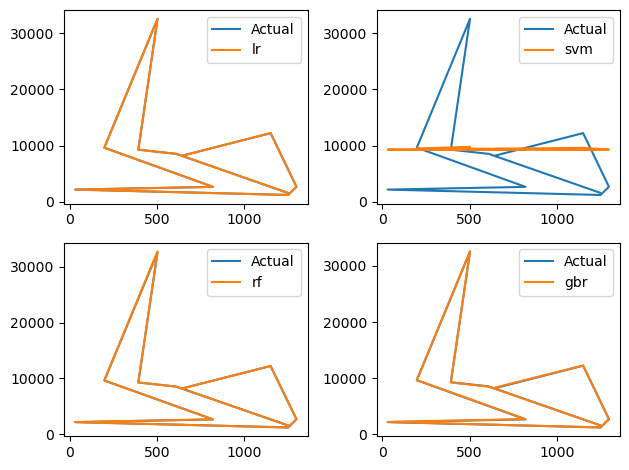

In [148]:
plt.subplot(2,2,1)
plt.plot(df1["Actual"].iloc[0:11], label="Actual")
plt.plot(df1["lr"].iloc[0:11], label="lr")
plt.legend()

plt.subplot(2,2,2)
plt.plot(df1["Actual"].iloc[0:11], label="Actual")
plt.plot(df1["svm"].iloc[0:11], label="svm")
plt.legend()

plt.subplot(2,2,3)
plt.plot(df1["Actual"].iloc[0:11], label="Actual")
plt.plot(df1["rf"].iloc[0:11], label="rf")
plt.legend()

plt.subplot(2,2,4)
plt.plot(df1["Actual"].iloc[0:11], label="Actual")
plt.plot(df1["gbr"].iloc[0:11], label="gbr")
plt.legend()

plt.tight_layout()

In [149]:
rs1 = metrics.r2_score(y_test, y_pred1)
rs2 = metrics.r2_score(y_test, y_pred2)
rs3 = metrics.r2_score(y_test, y_pred3)
rs4 = metrics.r2_score(y_test, y_pred4)

In [150]:
print(rs1, rs2, rs3, rs4)


1.0 -0.09747320782664137 0.9999068256888041 0.9997423314138189


<AxesSubplot:ylabel='Count'>

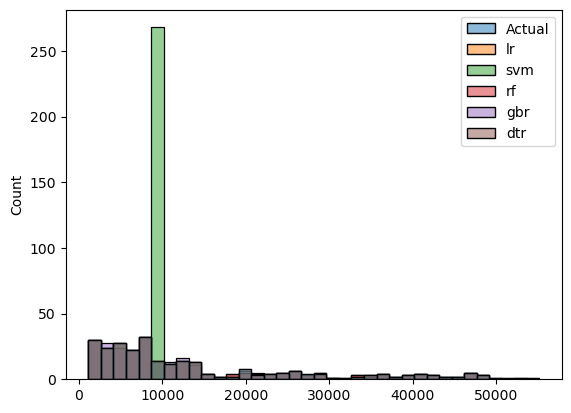

In [157]:
sns.histplot(data=df1)

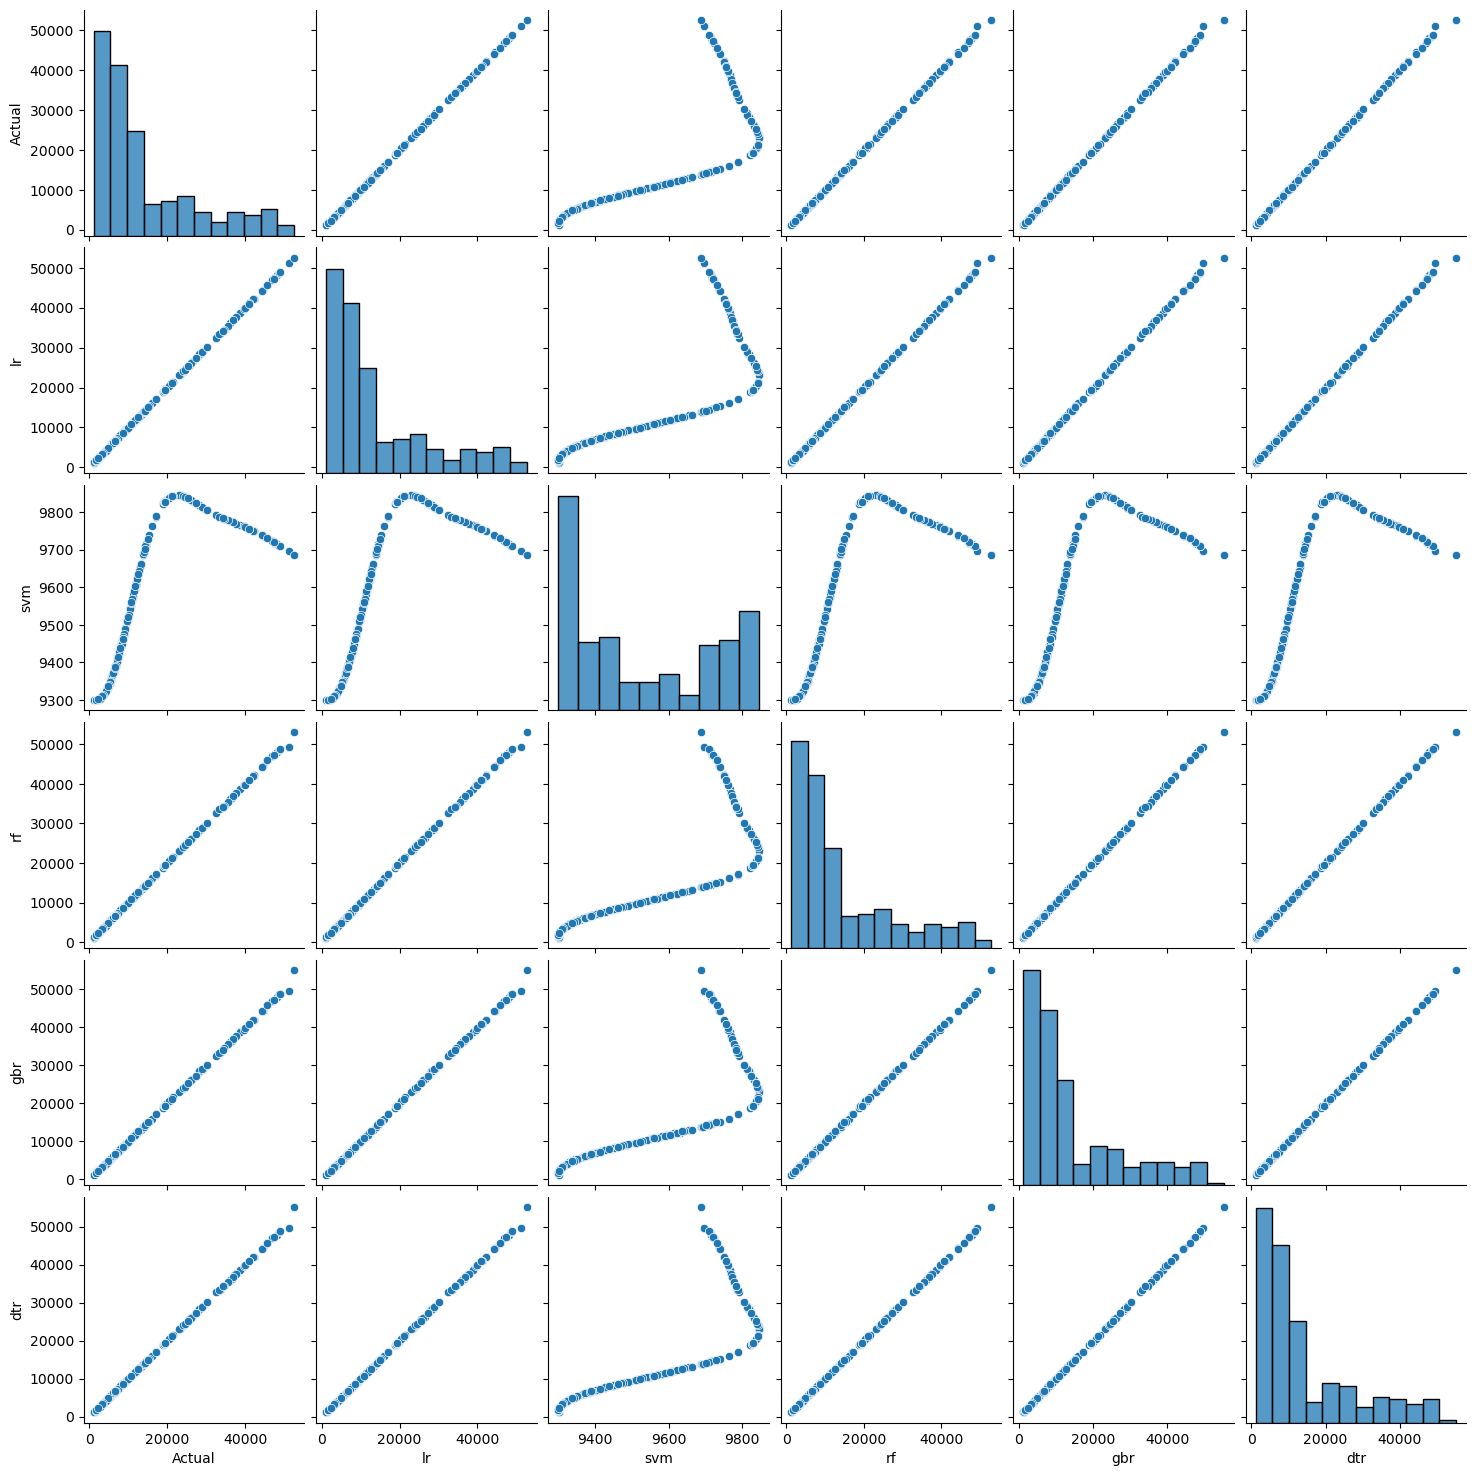

In [169]:
sns.pairplot(data=df1)

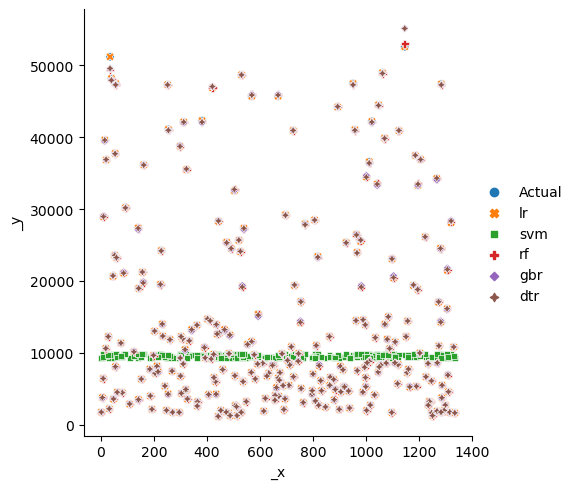

In [170]:
sns.relplot(data=df1)

<AxesSubplot:>

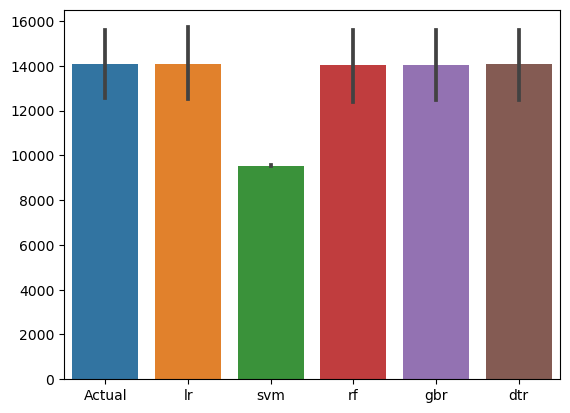

In [173]:
sns.barplot(data=df1)

<AxesSubplot:>

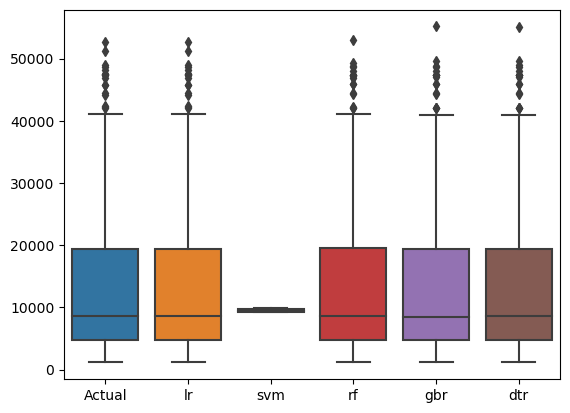

In [174]:
sns.boxplot(data=df1)

array([[<AxesSubplot:title={'center':'Actual'}>,
        <AxesSubplot:title={'center':'lr'}>],
       [<AxesSubplot:title={'center':'svm'}>,
        <AxesSubplot:title={'center':'rf'}>],
       [<AxesSubplot:title={'center':'gbr'}>,
        <AxesSubplot:title={'center':'dtr'}>]], dtype=object)

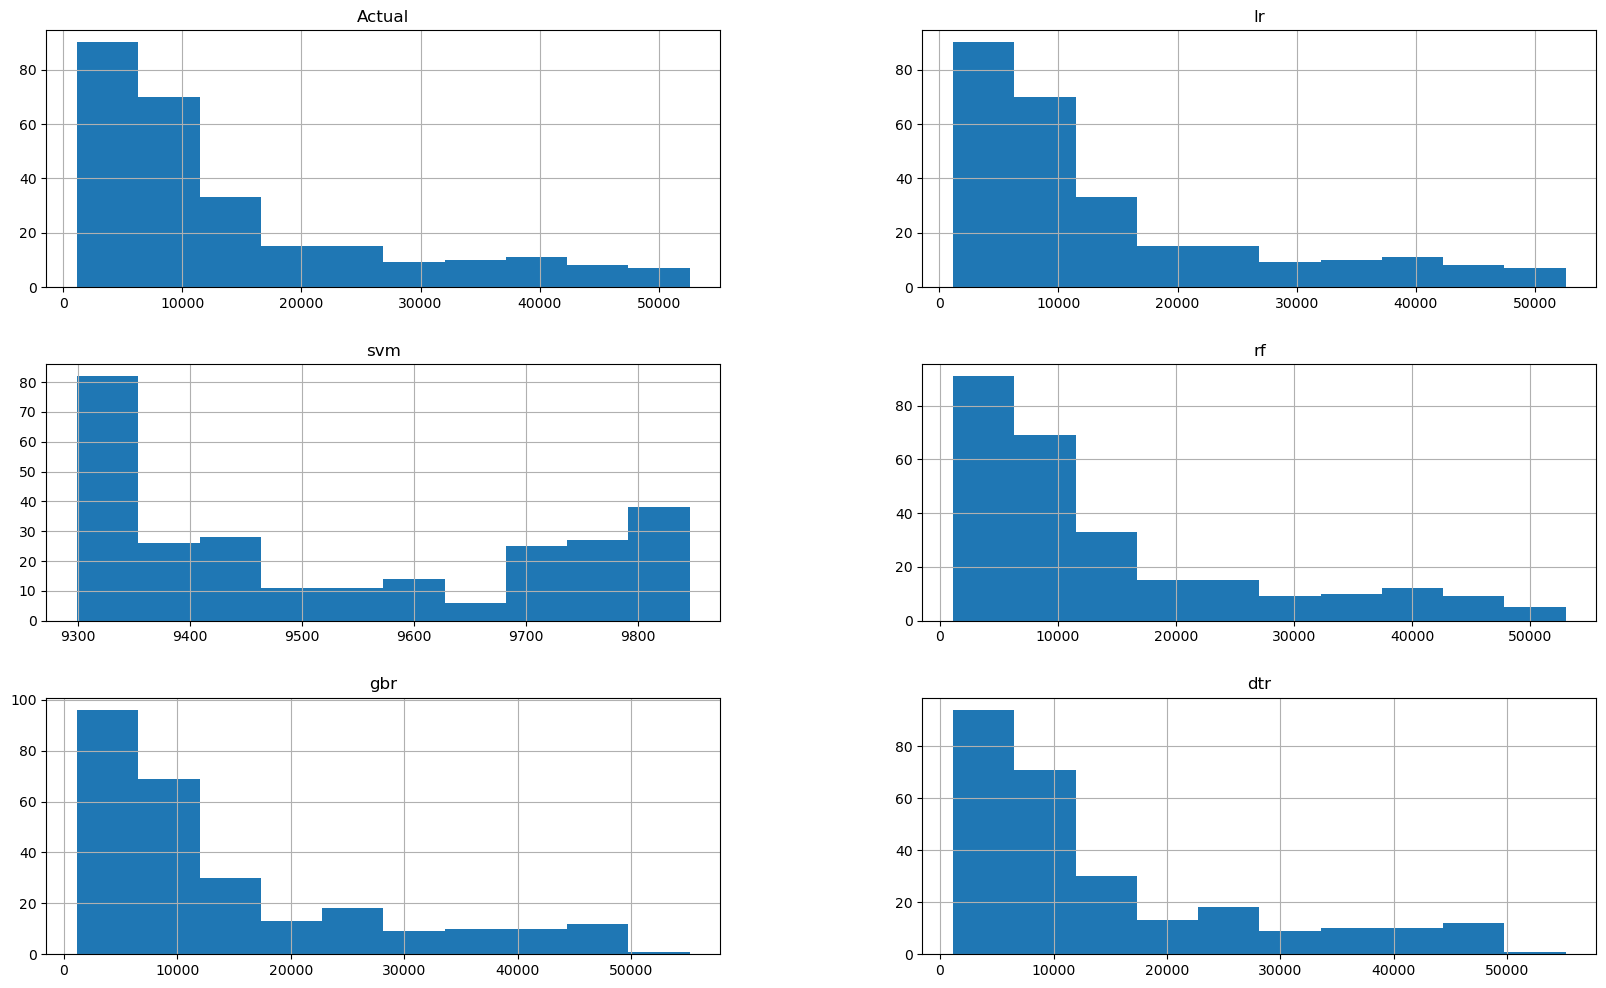

In [176]:
df1.hist(figsize=(20,12))